<!-- <img src="images/movie_studio.jpeg" alt="Drawing" style="width: 900px;"/> -->


![](images/movie_studio.jpeg)

# Microsoft New Movie Studio

**Author:** Albane Colmenares
***

## Overview

This notebook examines various movie databases that encompass data from thousands of movies. It focuses on movies released in the past 10 years to ensure the results would remain relevant, and to understand how what metrics generate profit rapidly. 

The analysis was centered on 3 main points:
- genre
- budget  
- actors 

By conducting a study of these data points, the aim is to provide valuable insights to help Microsoft's new movie studio focus on the main indicators of a movie's success.

Action movies generated the highest profit from 2010 to 2018 with over $8 billion generated. Adventure and Comedy are the 2nd and 3rd most profitable genres. <br>Making a combination of these 3 genres is the first recommendation.

Second, Comedy movies have a higher return on investment but generate less. Microsoft should make Comedy films at lower cost (median of \\$21 million budget) to generate profit and build resources to create less, but more profitable Action and Adventure movies - which require a median investment of \\$80 million. 
A very high correlation was found between a movie's budget and its profit, so costs should not be saved there. 

Finally, some actors were identified as generating the most profit in recent years - and having them starring in an action movie would most likely contribute to higher results. These include: Robert Downey Jr., Dwayne Johnson, Chris Evans.


## Business problem

The project's goal is to provide Microsoft's head of new movie studio with 3 recommendations for the new studio they are creating. The actionable insights are based on data on existing movies' performances by understanding which movies are doing best at the box office. Datasets are from Box Office Mojo, IMDb, Rotten Tomatoes, The Movie Database and The Numbers.

From this data, Pearson's correlation was calculated to review the relationship between a movie's runtime and its profit. Median of both runtime and ratings was calculated to understand the relative preference. Groupby was used to review the sum of profit by genre and by actor.


## Data Understanding

The data comes from main movies' data collection websites: Box Office Mojo, IMDb, Rotten Tomatoes, The Movie Database, and The Numbers. <br>
The data represents all movies' key metrics of performance and descriptions: 
<br>

Basic movies' descriptions:
- their title 
- the studio that created the movie
- in what year the movie first went out in theaters
- how long the movie runs for 
- what genres it belongs to
- in which language it is 
- if the movie and the movie's title was translated 

<br>
The persons involved in the movie's creation:

- actors
- directors 
- producers
- writers

<br>
How movies were received:

- ratings
- by the general public
- by journalists 

<br>
Movies' key performance metrics:

- worldwide profit calculated from:
    - domestic and foreign box office
    - minus budget invested to make the movie
- movie ratings 
- runtime 

<br>
The target variable used to measure movies' performances was profit.
<br>

The sum of profit was calculated by the various dimensions selected to measure a movie's success.

## Data Understanding

The next lines of codes will open all data sources to understand what information is accessible, will transform numbers' data into integers by stripping any characters that prevent from reading them as integers.

Standard packages to read and process data in jupyter are imported.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 

%matplotlib inline


### 1. Box Office Mojo

All movies that don't have domestic revenue have foreign revenues so they were distributed oversees. 
<br> Null rows in domestic gross can be replaced by 0, and so can null rows in foreign gross. 

In [2]:
# Loading bom.movie_gross and storing data into df_bom
df_bom = pd.read_csv("data/bom.movie_gross.csv.gz", compression="gzip")

In [3]:
# Inspect overall shape of the dataframe
df_bom.shape

(3387, 5)

In [4]:
# Inspect overall info of the dataframe
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
# Convert foreign_gross column as float
df_bom["foreign_gross"] = df_bom["foreign_gross"].str.replace(",","").astype(np.float64)

# Filling na values with 0 on both columns:
df_bom.update(df_bom[["domestic_gross", "foreign_gross"]].fillna(0))

### 2. IMDb

The IMDb dataset is made of 7 tables, each detailing information about movies. 

The used tables will be movie_ratings, movie_basics and known_for. 
movie_basics includes the movies' genres and movie ids. Movie ids will be used to merge to movie_ratings to have an understanding of the preferred runtime to be able to better understand those that generate the most profit.

Movie ids is also used to merge to principals, to identify actors who starred in the most profitable movies.

In [6]:
# Loading and inspecting available datasets
import zipfile
with zipfile.ZipFile("data/im.db.zip", "r") as zip_ref:
    zip_ref.extractall("data")


In [7]:
# Creating connection to database
conn = sqlite3.connect("data/im.db")

# Creating a cursor
cur = conn.cursor()

In [8]:
# Opening df_imdb database
df_imdb = pd.read_sql("""
                SELECT * 
                FROM sqlite_master
                ;
""", con=conn)
df_imdb

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


Now opening and inspecting each table that are contained in df_imdb into a dataframe.

In [9]:
# Opening and storing movie_basics table
movie_basics = pd.read_sql(
"""
SELECT * 
FROM movie_basics
;
"""
, con=conn)

movie_basics.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [10]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The raw file contains text initially written in non-English language which causes columns to generate unreadable characters (non-ascii).

A new column "clean_primary" is created to clean the "primary_title" column. It is first encoded as ascii and then decoded again to be read as a string and to replace the characters.

In [11]:
# Data cleaning movie_basics  
movie_basics["clean_primary"] = movie_basics["primary_title"].str.normalize("NFKD").str.encode('ascii', errors='ignore').str.decode('utf-8')


In [12]:
# Opening and storing directors table
directors_df = pd.read_sql(
"""
SELECT * 
FROM directors
;
"""
, con=conn)

directors_df.head(3)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540


In [13]:
# Opening and storing known_for table
known_for_df = pd.read_sql(
"""
SELECT * 
FROM known_for
;
"""
, con=conn)

known_for_df.head(3)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471


In [14]:
# Opening and storing movie_akas table

movie_akas_df = pd.read_sql(
"""
SELECT * 
FROM movie_akas
;
"""
, con=conn)

movie_akas_df.head(3)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0


In [15]:
# Opening and storing movie_ratings table
movie_ratings_df = pd.read_sql(
"""
SELECT * 
FROM movie_ratings
;
"""
, con=conn)

movie_ratings_df.head(3)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [16]:
# Opening and storing persons table
persons_df = pd.read_sql(
"""
SELECT * 
FROM persons
;
"""
, con=conn)

persons_df.head(3)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"


In [17]:
# Opening and storing principals table

principals_df = pd.read_sql(
"""
SELECT * 
FROM principals
;
"""
, con=conn)

principals_df.head(3)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None


In [18]:
# Opening and storing writers table

writers_df = pd.read_sql(
"""
SELECT * 
FROM writers
;
"""
, con=conn)

writers_df.head(3)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864


### 3.a. Rotten Tomatoes - Movie Info


In [19]:
# Inspecting rt.movie_info file
# Loading rt.movie_info and storing data into df_rt

df_rt = pd.read_csv("data/rt.movie_info.tsv.gz", compression="gzip", sep="\t")

df_rt.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [20]:
# Inspect overall shape and info of the dataframe
df_rt.shape
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### 3.b. Rotten Tomatoes - Reviews

The Rotten Tomatoes dataset does not contain any movie title or movie id, so is not used in this analysis

In [21]:
# Inspecting rt.reviews file
# Loading rt.reviews and storing data into df_reviews

df_reviews = pd.read_csv("data/rt.reviews.tsv.gz", compression="gzip", sep="\t", encoding = "unicode_escape")
df_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [22]:
# Inspect overall shape and info of the dataframe
df_reviews.shape
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


### 4. The Movie Database

The Movie Database was not used in this particular analysis as The Numbers' dataset contained all information, including budget and worldwide box offife under the same dataset.

In [23]:
# Loading tmdb.movies and storing data into df_tmdb
# Dropping the unnamed column upon opening
df_tmdb = pd.read_csv("data/tmdb.movies.csv.gz", compression="gzip", index_col=0)
df_tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [24]:
# Inspect overall shape and info of the dataframe
df_tmdb.shape
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


### 5. The Numbers

The Numbers" dataset contains both box office and budget numbers per movie so the analysis will start from this dataset.  

The file is compressed with gzip. The raw file contains text initially written in non-English language which causes columns to generate unreadable characters (non-ascii). 

A new column "clean_movie" is created to clean the "movie" column. It is first encoded as ascii and then decoded again to be read as a string and to replace the characters.

The column "start_year" will be used to merge the IMDb dataframe with The Numbers" dataframe. "start_year""s data type is integer so the "year" column will be converted from string to integer in The Number"s dataframe.

In [25]:
# Inspecting tn.movie_budgets file
# Loading tn.movie_budgets and storing data into df_tn
df_tn = pd.read_csv("data/tn.movie_budgets.csv.gz", compression="gzip")

In [26]:
df_tn["clean_movie"] = df_tn["movie"].str.encode("ascii", errors="replace").str.decode("utf-8")

In [27]:
df_tn.shape
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   clean_movie        5782 non-null   object
dtypes: int64(1), object(6)
memory usage: 316.3+ KB


All number columns are turned as integers to be able to make calculations from them.

In [28]:
# Make all number columns as integers
columns_to_integers = ["production_budget" , "domestic_gross", "worldwide_gross"]

for column in columns_to_integers:
    df_tn[column] = df_tn[column].astype(str).str.replace(",", '').str.replace("$", "").astype(np.int)

df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,clean_movie
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Avatar
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Dark Phoenix
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Star Wars Ep. VIII: The Last Jedi


## Data Preparation

The Numbers dataset, as well as IMDb 3 tables are used to conduct the analysis.

### 1. Numeric columns
Two columns were created in The Numbers' Dataset. 
- worldwide_profit column is created by subtracting budget to worldwide_gross
    - Profit is calculated by decucting costs from revenues
    - worldwide_profit is divided by one million to facilitate reading 
- year: using the year in the date of release_date column

#### 1. a. Worldwide profit

In [29]:
# Create worldwide_profit column divided by 1,000,000 for easier read. The new scale is now in million 
df_tn["worldwide_profit"] = (df_tn["worldwide_gross"] - df_tn["production_budget"]) /1000000

df_tn["worldwide_profit"]

0       2351.345279
1        635.063875
2       -200.237650
3       1072.413963
4        999.721747
           ...     
5777      -0.007000
5778       0.234495
5779      -0.003662
5780      -0.001400
5781       0.179941
Name: worldwide_profit, Length: 5782, dtype: float64

#### 1. b. Year

In [30]:
# Create year column
df_tn["year"] = df_tn["release_date"].str[-4:].astype(int)

A histogram of all movies' profit was drawn to understand what profit threshold determines whether a movie is considered successful, from its results. <br> The histogram is highly skewed to the left, indicating most movies either don't make profit or make up to $300 million. 

The number of movies reduces drastically from the $500 million profit mark, making it the threshold to define top performer movies to base the analysis on.


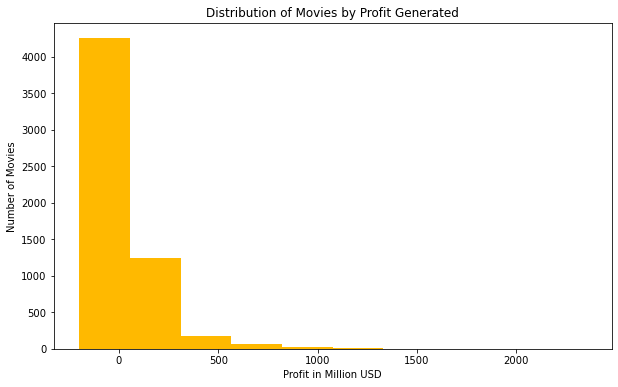

In [31]:
# See distribution through histograms to determine which movies to focus on
fig = plt.subplots(figsize=(10,6))

x = df_tn["worldwide_profit"]
num_bins = 10
plt.hist(x, num_bins, color="#FFB900")
plt.title("Distribution of Movies by Profit Generated")
plt.xlabel("Profit in Million USD")
plt.ylabel("Number of Movies")


plt.show()

### 2. Creating the Dataframe for Most Profitable Movies  

#### 2.a. df_top_tn
The dataframe df_top_tn is now created to filter only on top performing movies since 2010.

Creating a slice of The Numbers' dataframe and making a deep copy of it to prevent SettingWithCopyWarning.

In [32]:
df_top_tn = df_tn[(df_tn["worldwide_profit"] > 0.5) & (df_tn["year"] > 2009)].copy(deep=True)
# len(df_top_tn)
df_top_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,clean_movie,worldwide_profit,year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,635.063875,2011
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,1072.413963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Star Wars Ep. VIII: The Last Jedi,999.721747,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Star Wars Ep. VII: The Force Awakens,1747.311220,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,1748.134200,2018


#### 2.b. movie_title_episode columns

The column movie_title_episode is created in The Numbers' top performing dataframe "df_top_tn" to be used as the main column to merge this dataframe with the from IMDb. 

Two columns are created: 
1. movie_title
2. movie_episode

Separating the title of the movie from the episode when it was made in sequels. Both are then combined again into the column movie_title_episode ensuring the punctuation is stripped. 

When movie titles could not be stripped by a general rule, they were individually modified. 

The same columns are created, the same way in "movie_basics"


#### 2.b.1. movie_episode column

In [33]:
1. # Creating movie_episode column
# Under movie_episode, keeping only what comes after ":", replace the na values with "" and lower cap all strings

df_top_tn["movie_episode"] = df_top_tn["clean_movie"].map(lambda x: x.split(r":")).str[1].fillna("").str.lower()

# Replace roman numbers for part 1 and 2 for Harry Potter and the Deathly Hallows:

df_top_tn["movie_episode"] = df_top_tn["movie_episode"].str.replace("part ii", "part 2", regex=False).str.replace("part i", "part 1", regex=False)
# df_top_tn[["movie_episode_lambda", "movie_episode"]]

# Remove comas for Twilight:
df_top_tn["movie_episode"] = df_top_tn["movie_episode"].str.replace(",", "", regex=False)

# Remove hyphen for Hunger Games:
df_top_tn["movie_episode"] = df_top_tn["movie_episode"].str.replace(" -", "", regex=False)

# Create space between mission impossible and rest of the movie title, removed by the removal of non-ascii characters
df_top_tn["movie_episode"] = df_top_tn["movie_episode"].str.replace("impossible", "impossible ", regex=False)

# Spiderman contains 3D, to remove
df_top_tn["movie_episode"] = df_top_tn["movie_episode"].str.replace(" 3d", "", regex=False)

# Used only to verify that a specific movie is changed as expected
df_top_tn[df_top_tn["clean_movie"].str.contains("(?i)spider")]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,clean_movie,worldwide_profit,year,movie_episode
30,31,"Jul 3, 2012",The Amazing Spider-Man,220000000,262030663,757890267,The Amazing Spider-Man,537.890267,2012,
55,56,"May 2, 2014",The Amazing Spider-Man 2,200000000,202853933,708996336,The Amazing Spider-Man 2,508.996336,2014,
98,99,"Jul 7, 2017",Spider-Man: Homecoming,175000000,334201140,880166350,Spider-Man: Homecoming,705.166350,2017,homecoming
443,44,"Dec 14, 2018",Spider-Man: Into The Spider-Verse 3D,90000000,190173195,375381768,Spider-Man: Into The Spider-Verse 3D,285.381768,2018,into the spider-verse


#### 2.b.2. movie_title and movie_episode column

In [34]:
# Creating column movie_title if there were more than 1 movie
df_top_tn["movie_title"] = df_top_tn["clean_movie"].str.split("Ep\.").str[0].str.split("\bPart\b").str[0].str.split(r"[:)(!]").str[0].str.strip().str.lower()
# Leaving the "'"
# df_top_tn["movie_title"] = df_top_tn["clean_movie"].str.split("Ep\.").str[0].str.split("\bPart\b").str[0].str.split(r"[:)(]").str[0].str.strip().str.lower().str.replace(" the lorax", "the lorax", regex=False).str.replace("the hangover 3", "the hangover part iii")


# Creating column combining the movie title and the episode to have the same way in both
df_top_tn["movie_title_episode"] = df_top_tn["movie_title"].str.replace(".", "", regex=False) + df_top_tn["movie_episode"].str.lower()


# Changing "???" and to space,  and "??" to "e" and changing apostrophe to ', and changing all "&" to "and" 
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("???", " ", regex=False).str.replace("??", "e", regex=False).str.replace("'", " ", regex=False).str.replace("&", "and", regex=False)

# Extract Dr Seuss and Doctor Seuss, removing extra space on The Lorax and The Grinch 
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("dr seuss ", "", regex=False).str.replace("doctor seuss ", "", regex=False).str.replace(" the lorax", "the lorax", regex=False).str.replace(" the grinch", "the grinch", regex=False)

# Mission impossible extra space
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("impossible ", "impossible", regex=False)

# Monster Hunt
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("zhuo yao ji", "monster hunt", regex=False)

# The Conjuring
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("the conjuring 2 the enfield poltergeist", "the conjuring 2", regex=False)

# The Hangover Part III
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("the hangover 3", "the hangover part iii", regex=False)

# We're the millers 
# df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("were the millers", "we re the millers", regex=False)

# John Wick 3 Parabellum
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("john wick chapter 3   parabellum", "john wick chapter 3 parabellum", regex=False)

# Changing Disney Planes to Planes
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("disney planes", "planes", regex=False)

# Changing Disney Planes to Planes
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("the divergent series insurgent", "insurgent", regex=False)

# # Changing Disney Planes to Planes
# df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("the divergent series insurgent", "insurgent", regex=False)

# Used only to verify that a specific movie is changed as expected
df_top_tn[df_top_tn["clean_movie"].str.contains("(?i)millers")]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,clean_movie,worldwide_profit,year,movie_episode,movie_title,movie_title_episode
1589,90,"Aug 7, 2013",We're the Millers,37000000,150394119,267816276,We're the Millers,230.816276,2013,,we're the millers,we re the millers


In [35]:
# This cell is used only for troubleshooting. For troubleshoot: replace spaces with "_"
df_top_tn[df_top_tn["movie_title_episode"].str.contains("(?i)insurgent", na=False)]["movie_title_episode"].str.replace(" ", "_",regex=False)

321    insurgent
Name: movie_title_episode, dtype: object

Now applying the same process in the dataframe movie_basics to allow to merge the two dataframes on the column "movie_title_episode". 

In [36]:
# Same process in movie_basics 

# Creating column movie_episode if there were more than 1 movie
movie_basics["movie_episode"] = movie_basics["clean_primary"].str.split(r":").str[1].fillna("").str.lower()

# Creating column movie_title if there were more than 1 movie
# movie_basics["movie_title"] = movie_basics["clean_primary"].str.split("\bPart\b").str[0].str.split(r"[:)(]").str[0].str.strip().str.replace(".", "", regex=False).str.replace("'", "", regex=False).str.replace("&", "and", regex=False).str.replace("The Mermaid", "mei ren yu", regex=False).str.replace("The Intouchables", "les intouchables", regex=False).str.lower()
movie_basics["movie_title"] = movie_basics["clean_primary"].str.split("\bPart\b").str[0].str.split(r"[:)(]").str[0].str.strip().str.replace(".", "", regex=False).str.replace("&", "and", regex=False).str.replace("The Mermaid", "mei ren yu", regex=False).str.replace("The Intouchables", "les intouchables", regex=False).str.lower()

# Creating column combining the movie title and the episode to have the same way in both
movie_basics["movie_title_episode"] = movie_basics["movie_title"] +  movie_basics["movie_episode"].str.lower().str.replace(" episode vii -", "", regex=False).str.replace(" - ", " ", regex=False)
# movie_basics["movie_title_episode"] = movie_basics["movie_title"] +  movie_basics["movie_episode"].str.replace(pattern, replacement, regex=False).str.lower()

# Change apostrophe to space
movie_basics["movie_title_episode"] = movie_basics["movie_title_episode"].str.replace("'", " ", regex=False)

# Turn Eight to numeric in Ocean's 8
movie_basics["movie_title_episode"] = movie_basics["movie_title_episode"].str.replace("ocean s eight", "ocean s 8", regex=False)

# Correcting Maze Runner
movie_basics["movie_title_episode"] = movie_basics["movie_title_episode"].str.replace("the death cure", "maze runner the death cure", regex=False)

# Changing Shazam
movie_basics["movie_title_episode"] = movie_basics["movie_title_episode"].str.replace("shazam!", "shazam", regex=False)

# Changing Jackass Bad Grandpa
movie_basics["movie_title_episode"] = movie_basics["movie_title_episode"].str.replace("bad grandpa", "jackass presents bad grandpa", regex=False)

# Changing Prince of Persia
movie_basics["movie_title_episode"] = movie_basics["movie_title_episode"].str.replace("prince of persia the sands of time", "prince of persia sands of time", regex=False)


# For verification
# movie_basics[movie_basics["original_title"].str.contains("(?i)sands of time", na=False)].head(100)

In [37]:
# For troubleshoot: replace spaces with "_"
movie_basics[movie_basics["movie_title_episode"].str.contains("(?i)hansel", na=False)]["movie_title_episode"].str.replace(" ", "_",regex=False)

7512               hansel_and_gretel_witch_hunters
27509                  hansel_and_gretel_get_baked
38504     hansel_and_gretel_warriors_of_witchcraft
70676                             hansel_et_gretel
72618                             hansel_vs_gretel
120097                           hansel_und_gretel
140254                           gretel_and_hansel
Name: movie_title_episode, dtype: object

### 3. Merging Both Dataframes Into top_movies

Now that the column movie_title_episode was created in both dataframes, most profitable movies from The Numbers and Basics from IMDb database. 
The two dataframes are also merged on year, to avoid duplication if two movies are named the same, for example Les Miserables.


In [38]:
top_movies = pd.merge(df_top_tn, movie_basics, how="left", 
                     left_on=["movie_title_episode", "year"], 
                     right_on=["movie_title_episode", "start_year"])

In [39]:
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321 entries, 0 to 1320
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1321 non-null   int64  
 1   release_date         1321 non-null   object 
 2   movie                1321 non-null   object 
 3   production_budget    1321 non-null   int64  
 4   domestic_gross       1321 non-null   int64  
 5   worldwide_gross      1321 non-null   int64  
 6   clean_movie          1321 non-null   object 
 7   worldwide_profit     1321 non-null   float64
 8   year                 1321 non-null   int64  
 9   movie_episode_x      1321 non-null   object 
 10  movie_title_x        1321 non-null   object 
 11  movie_title_episode  1321 non-null   object 
 12  movie_id             1135 non-null   object 
 13  primary_title        1135 non-null   object 
 14  original_title       1135 non-null   object 
 15  start_year           1135 non-null   f

The null rows for movie_id all represent movies that generated profits lower than $500 million and the sample already contains more than 1,100 rows so is large enough to be representatitve. Null values will be dropped.  

In [40]:
top_profit_movies = top_movies.dropna(subset=["movie_id"])

In [41]:
top_profit_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 0 to 1320
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1135 non-null   int64  
 1   release_date         1135 non-null   object 
 2   movie                1135 non-null   object 
 3   production_budget    1135 non-null   int64  
 4   domestic_gross       1135 non-null   int64  
 5   worldwide_gross      1135 non-null   int64  
 6   clean_movie          1135 non-null   object 
 7   worldwide_profit     1135 non-null   float64
 8   year                 1135 non-null   int64  
 9   movie_episode_x      1135 non-null   object 
 10  movie_title_x        1135 non-null   object 
 11  movie_title_episode  1135 non-null   object 
 12  movie_id             1135 non-null   object 
 13  primary_title        1135 non-null   object 
 14  original_title       1135 non-null   object 
 15  start_year           1135 non-null   f

In [42]:
top_profit_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,clean_movie,worldwide_profit,year,movie_episode_x,...,movie_title_episode,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,clean_primary,movie_episode_y,movie_title_y
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,635.063875,2011,on stranger tides,...,pirates of the caribbean on stranger tides,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides,on stranger tides,pirates of the caribbean
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,1072.413963,2015,age of ultron,...,avengers age of ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,age of ultron,avengers
2,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Star Wars Ep. VIII: The Last Jedi,999.721747,2017,the last jedi,...,star wars the last jedi,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017.0,152.0,"Action,Adventure,Fantasy",Star Wars: The Last Jedi,the last jedi,star wars
3,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Star Wars Ep. VII: The Force Awakens,1747.311220,2015,the force awakens,...,star wars the force awakens,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015.0,136.0,"Action,Adventure,Fantasy",Star Wars: Episode VII - The Force Awakens,episode vii - the force awakens,star wars
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,1748.134200,2018,infinity war,...,avengers infinity war,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War,infinity war,avengers


Unnecessary or duplicated columns are dropped. Only the genre, the cleaned version of the title is necessary, along with the year 

In [43]:
# Drop unnecessary columns
top_profit_movies = top_profit_movies.drop(columns=["release_date", "id","movie","movie_episode_x", "movie_title_x","primary_title", "original_title", "movie_episode_y", "movie_title_y", "start_year", "clean_primary"])


In [44]:
top_profit_movies.head()

,production_budget,domestic_gross,worldwide_gross,clean_movie,worldwide_profit,year,movie_title_episode,movie_id,runtime_minutes,genres
0,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,635.063875,2011,pirates of the caribbean on stranger tides,tt1298650,136.0,"Action,Adventure,Fantasy"
1,330600000,459005868,1403013963,Avengers: Age of Ultron,1072.413963,2015,avengers age of ultron,tt2395427,141.0,"Action,Adventure,Sci-Fi"
2,317000000,620181382,1316721747,Star Wars Ep. VIII: The Last Jedi,999.721747,2017,star wars the last jedi,tt2527336,152.0,"Action,Adventure,Fantasy"
3,306000000,936662225,2053311220,Star Wars Ep. VII: The Force Awakens,1747.311220,2015,star wars the force awakens,tt2488496,136.0,"Action,Adventure,Fantasy"
4,300000000,678815482,2048134200,Avengers: Infinity War,1748.134200,2018,avengers infinity war,tt4154756,149.0,"Action,Adventure,Sci-Fi"


## Data Modeling

### 1. Evaluating most profitable genres

Multiple genres are attributed to genres but only the first one, the main genre, will be used to determine the category of a movie. 

To do so, the column genre will be turned as a list so the column "main_genre" can be created with the first item of the list.

The sum of profit by genre is calculated using groupby, and summarized among the top 10 genres. 

Action genre generated the most profit between 2010 and 2018, producing over 82 billion dollars in profit. Adventure and Comedy movies get the second and third place, reaching respectively 37 and 15 billion dollar profit over these years. 

Focusing on these three genres - primarily Action movies, will be the safest choice for Microsoft to ensure higher profits can be generated.

In [45]:
top_profit_movies["genres"] = top_profit_movies["genres"].str.split(",")
top_profit_movies["main_genre"] = top_profit_movies["genres"].str[0]

top_profit_movies.head()

,production_budget,domestic_gross,worldwide_gross,clean_movie,worldwide_profit,year,movie_title_episode,movie_id,runtime_minutes,genres,main_genre
0,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,635.063875,2011,pirates of the caribbean on stranger tides,tt1298650,136.0,"[Action, Adventure, Fantasy]",Action
1,330600000,459005868,1403013963,Avengers: Age of Ultron,1072.413963,2015,avengers age of ultron,tt2395427,141.0,"[Action, Adventure, Sci-Fi]",Action
2,317000000,620181382,1316721747,Star Wars Ep. VIII: The Last Jedi,999.721747,2017,star wars the last jedi,tt2527336,152.0,"[Action, Adventure, Fantasy]",Action
3,306000000,936662225,2053311220,Star Wars Ep. VII: The Force Awakens,1747.311220,2015,star wars the force awakens,tt2488496,136.0,"[Action, Adventure, Fantasy]",Action
4,300000000,678815482,2048134200,Avengers: Infinity War,1748.134200,2018,avengers infinity war,tt4154756,149.0,"[Action, Adventure, Sci-Fi]",Action


In [46]:
top_5_genres = top_profit_movies.groupby(["main_genre"])[["worldwide_gross", "worldwide_profit"]].sum().sort_values("worldwide_profit", ascending=False).reset_index()[:5]
top_5_genres

,main_genre,worldwide_gross,worldwide_profit
0,Action,116773469805,82337.079805
1,Adventure,50645833404,37273.233404
2,Comedy,21769929094,15392.479094
3,Drama,16074553460,12183.230810
4,Biography,8864816505,6758.046505


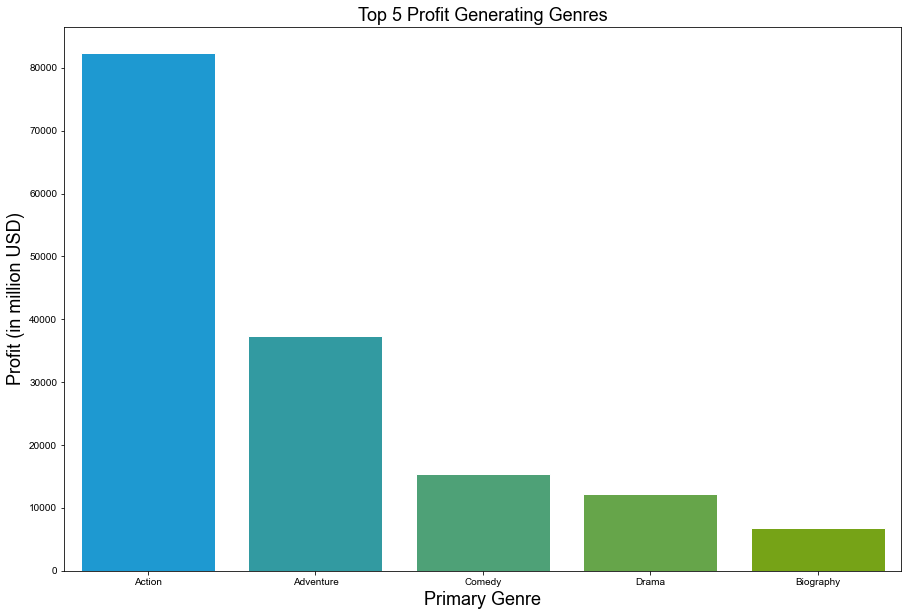

In [47]:
# Displaying sum of profit by genres
fig1, ax1 = plt.subplots(figsize=(15, 10))

sns.set(style="whitegrid", color_codes=True, font_scale=1.9)
                        
sns.barplot(data=top_5_genres, x="main_genre", y="worldwide_profit", palette="blend:#00A4EF,#7FBA00")

ax1.set_title("Top 5 Profit Generating Genres", fontsize=18)
ax1.set_xlabel("Primary Genre", fontsize=18)
ax1.set_ylabel("Profit (in million USD)", fontsize=18)

plt.savefig("images/profit_genres.png")

### 2. Defining Relationship Between Budget And Profit For These Genres 

The relationship between profit and budget is analyzed by filtering on the top 5 profitable genres.  

Production budget and worldwide gross revenue were divided by one million as well to have comparable scales. 
Pearson's correlation was calculated. A high positive correlation was found between how much investment is made in a movie, and its profit. 

The median budget for Action and Adventure is 80 million while Comedy movies require a lower production upfront cost: \\$21 million. 

Microsoft should make Comedy films at lower cost (median of \\$21 million budget) to generate profit and build resources to create less, but generate more profit: Action and Adventure movies.


In [48]:
# Filtering the dataframe top_profit_movies the top 3 genres
budget_needed = top_profit_movies[top_profit_movies["main_genre"].isin(["Action", "Adventure", "Comedy"])]


In [49]:
# Dividing production_budget by 1,000,000 to show the same scale as worldwide_profit
budget_needed["production_budget"] = (budget_needed["production_budget"]/1000000)

# Dividing production_budget by 1,000,000 to show the same scale as worldwide_profit
budget_needed["worldwide_gross"] = (budget_needed["worldwide_gross"]/1000000)

<ipython-input-49-9f4b7dd9c373>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_needed["production_budget"] = (budget_needed["production_budget"]/1000000)
<ipython-input-49-9f4b7dd9c373>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_needed["worldwide_gross"] = (budget_needed["worldwide_gross"]/1000000)


In [50]:
# Calculation correlation between budget and profit by genre
corr_budget_profit = budget_needed.groupby(["main_genre"])[["worldwide_profit", "production_budget"]].sum().sort_values("worldwide_profit", ascending=False).reset_index()
corr_budget_profit

,main_genre,worldwide_profit,production_budget
0,Action,82337.079805,34436.39
1,Adventure,37273.233404,13372.60
2,Comedy,15392.479094,6377.45


The correlation between budget and profit is over 0.99. This indicates there is a very high correlation between a movie's budget used for its production and the profit it made. 

In [51]:
corr_budget_profit[["worldwide_profit", "production_budget"]].corr(method="pearson")

,worldwide_profit,production_budget
worldwide_profit,1.000000,0.996437
production_budget,0.996437,1.000000


Now calculating median budget and profit by genre. 
In addition, calculating the median percentage cost by genre to evaluate which genre will make has a higher return on investment. 

In [52]:
median_budget_profit = budget_needed.groupby(["main_genre"])[["worldwide_profit", "worldwide_gross", "production_budget"]].median().sort_values("worldwide_profit", ascending=False).reset_index()
median_budget_profit["pct_cost"] = median_budget_profit["production_budget"] / (median_budget_profit["worldwide_gross"])
median_budget_profit["pct_profit"] = 1 - median_budget_profit["pct_cost"] 
median_budget_profit

,main_genre,worldwide_profit,worldwide_gross,production_budget,pct_cost,pct_profit
0,Adventure,143.316307,215.126795,80.0,0.371874,0.628126
1,Action,123.617305,214.949716,80.0,0.372180,0.627820
2,Comedy,40.831067,69.807260,21.0,0.300828,0.699172


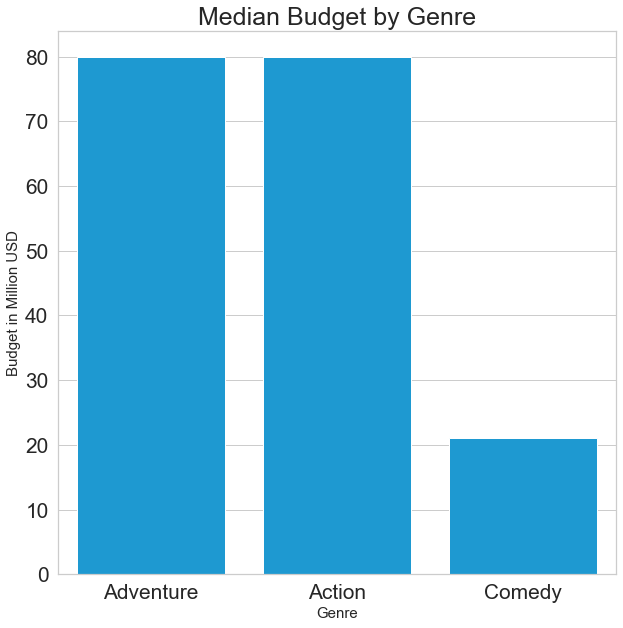

In [53]:
# Displaying average of profit by actors
fig, ax = plt.subplots(figsize=(10, 10))


# Creating profit and budget color palettes 
budget_color = ["#00A4EF", "#00A4EF", "#00A4EF"]

# microsoft = ["#00A4EF", "#7FBA00", "#FFB900","#F25022"]

sns.set(style="whitegrid")
                        
ax = sns.barplot(data=median_budget_profit, x="main_genre", y="production_budget", palette=budget_color)


ax.set_title("Median Budget by Genre", fontsize=25)
ax.set_xlabel("Genre", fontsize=15)
ax.set_ylabel("Budget in Million USD", fontsize=15)

plt.savefig("images/median_budget.png")

plt.show()

#### Additional - side analysis to evaluate the correlation between budget and profit by genre

Importing Matplotlib Ticker to use FixedLocator to fix the FixedLocator Warning.

Also fixed the sizes of dots in the legend using get_legend_handles_labels function, to divide by 5 their usual size. This makes them fit in the legend, and improves readability.

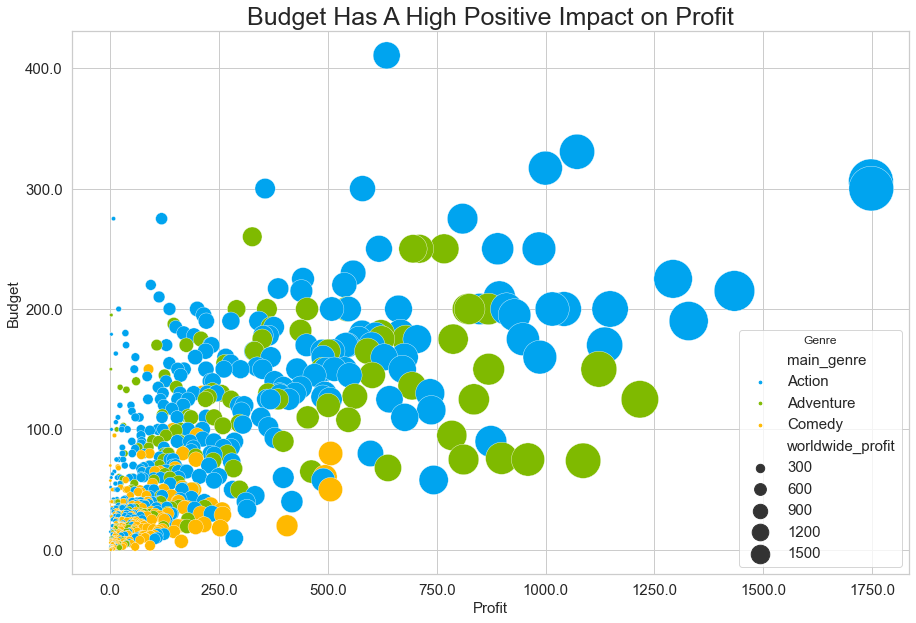

In [54]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(15, 10))

# Create Microsoft color palette 
microsoft = ["#00A4EF", "#7FBA00", "#FFB900"]

# sns.set_palette(microsoft)

sns.scatterplot(data=budget_needed,
               x="worldwide_profit",
               y="production_budget",
#                size="worldwide_profit"
               size="worldwide_profit", 
                sizes=(10,2000),
                hue="main_genre",
                palette=microsoft,
#                 legend=False
               )



handles, labels = ax.get_legend_handles_labels()
for h in handles:
    sizes = [s/5 for s in h.get_sizes()]
    h.set_sizes(sizes)

# labels = labels[1:]

ax.set_title("Budget Has A High Positive Impact on Profit", fontsize=25)
ax.set_xlabel("Profit", fontsize=15)
ax.set_ylabel("Budget", fontsize=15)

ticks_loc_x = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc_x))
ax.set_xticklabels(ticks_loc_x,size = 15)

ticks_loc_y = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc_y))
ax.set_yticklabels(ticks_loc_y,size = 15)

ax.legend(handles, labels, title="Genre", fontsize=15, loc=4)

plt.savefig("images/profit_budget.png")

plt.show()



### 3. Identifying the Actors Most Likely to Generate Profits

The principals table from IMDb database is filtered on the category "actor" and "actress" to then be merged with the persons table from the same database. 

This creates the actors_names" dataframe, associating person_id with the person"s name - for actors and actresses only. 

The age of the actors is not analyzed here so columns related to birth and death are dropped, along with whether the person has other professions.

actors_names is then merged with the top_profit_movies. The final dataframe top_profit_movies_actors is created.

Finally, using groupby, the sum of profit generated by actors and actresses between 2010 and 2018 is calculated and stored in the dataframe top_10_actors_profit.


Among the top actors, Robert Downey Jr. is the one who created the most profit with 7.8 billion dollars, closely followed by Dwayne Johnson with 6.7 billion dollars, and Chris Evans, with 5.8 billion.

Casting these actors in movies is more likely to contribute in the movie"s success, hence reaching higher profits. 

In [55]:
# Filtering only on category of persons identified as actor
df_actors = principals_df[["movie_id", "person_id", "category"]]
df_actors = df_actors[(df_actors["category"] == "actor") | (df_actors["category"] == "actress")]
df_actors.head()

,movie_id,person_id,category
0,tt0111414,nm0246005,actor
4,tt0323808,nm3579312,actress
5,tt0323808,nm2694680,actor
6,tt0323808,nm0574615,actor
7,tt0323808,nm0502652,actress


In [56]:
actors_names = pd.merge(df_actors, persons_df, how="inner",
                    left_on=["person_id"],
                    right_on=["person_id"]
                    )

In [57]:
actors_names.head()

,movie_id,person_id,category,primary_name,birth_year,death_year,primary_profession
0,tt0111414,nm0246005,actor,Tommy Dysart,NaN,NaN,actor
1,tt0323808,nm3579312,actress,Brittania Nicol,NaN,NaN,"actress,soundtrack"
2,tt0323808,nm2694680,actor,Henry Garrett,NaN,NaN,actor
3,tt0323808,nm0574615,actor,Graham McTavish,1961.0,NaN,"actor,soundtrack,director"
4,tt1680140,nm0574615,actor,Graham McTavish,1961.0,NaN,"actor,soundtrack,director"


In [58]:
# Drop unnecessary columns
actors_names = actors_names.drop(columns=["birth_year", "death_year", "primary_profession"])

In [59]:
actors_names.head()

,movie_id,person_id,category,primary_name
0,tt0111414,nm0246005,actor,Tommy Dysart
1,tt0323808,nm3579312,actress,Brittania Nicol
2,tt0323808,nm2694680,actor,Henry Garrett
3,tt0323808,nm0574615,actor,Graham McTavish
4,tt1680140,nm0574615,actor,Graham McTavish


In [60]:
top_profit_movies_actors = pd.merge(top_profit_movies, actors_names, how="inner", 
                                    left_on=["movie_id"], 
                                    right_on=["movie_id"])

In [61]:
top_profit_movies_actors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4433 entries, 0 to 4432
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   production_budget    4433 non-null   int64  
 1   domestic_gross       4433 non-null   int64  
 2   worldwide_gross      4433 non-null   int64  
 3   clean_movie          4433 non-null   object 
 4   worldwide_profit     4433 non-null   float64
 5   year                 4433 non-null   int64  
 6   movie_title_episode  4433 non-null   object 
 7   movie_id             4433 non-null   object 
 8   runtime_minutes      4425 non-null   float64
 9   genres               4430 non-null   object 
 10  main_genre           4430 non-null   object 
 11  person_id            4433 non-null   object 
 12  category             4433 non-null   object 
 13  primary_name         4433 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 519.5+ KB


In [62]:
top_profit_movies_actors.head()

,production_budget,domestic_gross,worldwide_gross,clean_movie,worldwide_profit,year,movie_title_episode,movie_id,runtime_minutes,genres,main_genre,person_id,category,primary_name
0,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,635.063875,2011,pirates of the caribbean on stranger tides,tt1298650,136.0,"[Action, Adventure, Fantasy]",Action,nm0000136,actor,Johnny Depp
1,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,635.063875,2011,pirates of the caribbean on stranger tides,tt1298650,136.0,"[Action, Adventure, Fantasy]",Action,nm0001691,actor,Geoffrey Rush
2,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,635.063875,2011,pirates of the caribbean on stranger tides,tt1298650,136.0,"[Action, Adventure, Fantasy]",Action,nm0574534,actor,Ian McShane
3,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,635.063875,2011,pirates of the caribbean on stranger tides,tt1298650,136.0,"[Action, Adventure, Fantasy]",Action,nm0004851,actress,Penélope Cruz
4,330600000,459005868,1403013963,Avengers: Age of Ultron,1072.413963,2015,avengers age of ultron,tt2395427,141.0,"[Action, Adventure, Sci-Fi]",Action,nm0262635,actor,Chris Evans


In [63]:
top_5_actors_profit = top_profit_movies_actors.groupby(["primary_name"])[["worldwide_gross", "worldwide_profit"]].sum().sort_values("worldwide_profit", ascending=False).reset_index()[:5]

In [64]:
top_5_actors_profit

,primary_name,worldwide_gross,worldwide_profit
0,Robert Downey Jr.,9649390358,7758.790358
1,Dwayne Johnson,8620447217,6747.447217
2,Chris Evans,7291117419,5823.517419
3,Vin Diesel,6376832737,5078.832737
4,Chris Pratt,5967404450,4748.904450


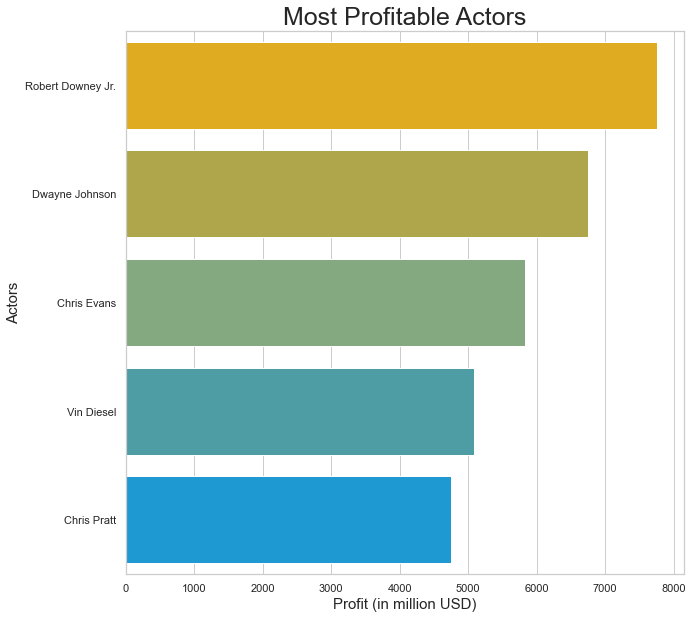

In [65]:
# Displaying sum of profit by actors
fig2, ax2 = plt.subplots(figsize=(10, 10))

sns.set(style="whitegrid", color_codes=True)
                        
sns.barplot(data=top_5_actors_profit, x="worldwide_profit", y="primary_name", palette="blend:#FFB900,#00A4EF", orient="h")

ax2.set_title("Most Profitable Actors", fontsize=25)
ax2.set_xlabel("Profit (in million USD)", fontsize=15)
ax2.set_ylabel("Actors", fontsize=15)



plt.savefig("images/profit_actors.png")

plt.show()

### Sidenote Analysis. Defining How Long a Movie Should Run For 

The relationship between profit, preferrence and runtime is evaluated by merging the top_profit_movies dataframe created and the movie_ratings_df from IMDb.

Both dataframes are merged on the movie_id column and unnecessary, duplicate columns are dropped. In this case, genre is not evaluated so is dropped as well. 

Most movies run higher than 75 minutes so shorter movies are considered outliers and dropped. 

While the median movie lasts 107 minutes, and average rating is at 6.5, the most profitable movies may vary between short and longer times - the most profitable movies even seem to last much longer: around 140 minutes.
The low result of Pearson"s correlation: 0.30, confirms there is no correlation between how long a movie is and how profitable it can be. 

In [66]:
profit_and_ratings = top_profit_movies.merge(movie_ratings_df, 
                                         how="inner", 
                                        left_on="movie_id",
                                        right_on="movie_id")

In [67]:
profit_and_ratings = profit_and_ratings.drop(columns=["clean_movie", "movie_title_episode", "genres"])

In [68]:
# Removing outliers
profit_and_ratings = profit_and_ratings[profit_and_ratings["runtime_minutes"] > 75]


In [69]:
runtime = profit_and_ratings["runtime_minutes"].tolist()
ratings = profit_and_ratings["averagerating"].tolist()

In [70]:
median_runtime = np.median(runtime)
print(median_runtime)

median_rating = np.median(ratings)
print(median_rating)

107.0
6.5


In [71]:
profit_and_ratings[["worldwide_profit", "runtime_minutes"]].corr(method="pearson")

,worldwide_profit,runtime_minutes
worldwide_profit,1.000000,0.303556
runtime_minutes,0.303556,1.000000


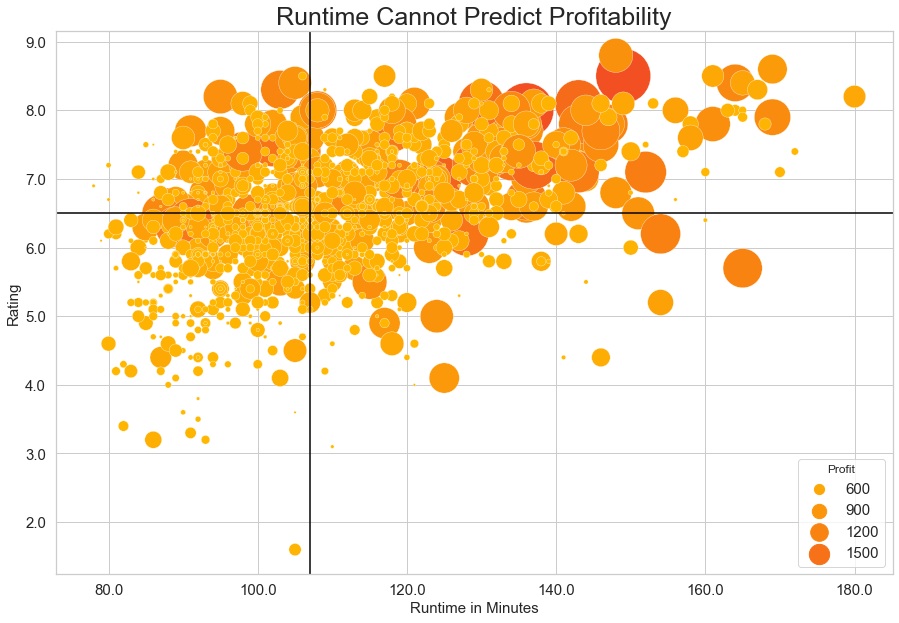

In [72]:


fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(data=profit_and_ratings, 
                x="runtime_minutes", 
                y="averagerating", 
               hue="worldwide_profit",
               size=profit_and_ratings["worldwide_profit"],
               palette="blend:#FFB900,#F25022", sizes=(5,3000))
plt.axvline(x=median_runtime, color="black")
plt.axhline(y=median_rating, color="black")

handles, labels = ax.get_legend_handles_labels()
for h in handles:
    sizes = [s/5 for s in h.get_sizes()]
    h.set_sizes(sizes)

labels = labels[1:]

ax.set_title("Runtime Cannot Predict Profitability", fontsize=25)
ax.set_xlabel("Runtime in Minutes", fontsize=15)
ax.set_ylabel("Rating", fontsize=15)

ticks_loc_x = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc_x))
ax.set_xticklabels(ticks_loc_x,size = 15)

ticks_loc_y = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc_y))
ax.set_yticklabels(ticks_loc_y,size = 15)

# ax.legend(title="Profit", fontsize=15, loc=4)
ax.legend(handles, labels, title="Profit", fontsize=15, loc=4)

plt.savefig("images/profit_runtime.png")

plt.show()

## Conclusions

## Below are three recommendations to create profitable movies

### 1. Genre 
* The first recommendation is to produce Action movies - which have generated the most profit from 2010 to 2018. This genre created 82 billion dollars profit over these years: 45 billion more than the second most profitable genre: Adventure. Comedy movies would come third recommendation for movies' genre to ensure reaching the highest profits rapidly. 


### 2. Budget

* The second recommendation is to highly invest in movies that are made. Microsoft should make Comedy films at lower cost (median of \\$21 million budget) to build a higher budget fund. This fund should be used to create less, but more profitable Action and Adventure movies - which require a median investment of \\$80 million. 


### 3. Casting 

* The last recommendation is to pick actors carefully. A list of actors became notably famous in their genre and are linked to higher profits generated. Actors such as Robert Downey Jr., Dwayne Johnson, Chris Evans have starred in the most profitable movies and became icons for the Action, Adventure and Comedy movies and are more likely to arouse interest for the movies they are part of. Care should be exercised to ensure these actors are associated with the genre they are famous for. 


#### Limitations 

* The analysis was run on the years 2010 to 2018 and would be more precise if it included even more recent data
* Some of the movies were not matched with a genre due to title differences and higher precision would be gained by pairing movie_id rather than merging on movie titles
* The analysis is based on box office profits, which do not include all other more recent revenue generators such as streaming revenue and product placement. 


In [73]:
# Closing connection
conn.close()
